# Decision tree classification

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [75]:
#importing the data sets
a = pd.read_csv('Social_Network_Ads.csv')
X = a.iloc[:, :-1].values
y = a.iloc[:, -1].values

In [76]:
a

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [77]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [78]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [118]:
#splitting the data set into the training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [119]:
X_train

array([[    27,  31000],
       [    35,  71000],
       [    49,  28000],
       [    35,  91000],
       [    37,  75000],
       [    32, 117000],
       [    36,  75000],
       [    20,  86000],
       [    38,  50000],
       [    49,  36000],
       [    40,  65000],
       [    37,  77000],
       [    60,  46000],
       [    48, 138000],
       [    40,  71000],
       [    36,  63000],
       [    26,  81000],
       [    33,  31000],
       [    41,  51000],
       [    46,  74000],
       [    18,  82000],
       [    37,  33000],
       [    35,  53000],
       [    28,  59000],
       [    37,  71000],
       [    18,  44000],
       [    38,  61000],
       [    35,  65000],
       [    31,  66000],
       [    47,  25000],
       [    42, 104000],
       [    19,  19000],
       [    21,  72000],
       [    28,  32000],
       [    52, 150000],
       [    53, 104000],
       [    25,  80000],
       [    26,  72000],
       [    26,  15000],
       [    40, 142000],


In [120]:
X_test

array([[    36,  33000],
       [    39,  61000],
       [    36, 118000],
       [    39, 122000],
       [    26, 118000],
       [    38,  65000],
       [    20,  36000],
       [    49,  89000],
       [    31,  18000],
       [    48, 141000],
       [    34,  72000],
       [    39,  73000],
       [    35,  72000],
       [    48, 131000],
       [    53,  82000],
       [    56, 133000],
       [    60,  83000],
       [    27,  58000],
       [    28,  87000],
       [    60, 102000],
       [    40,  75000],
       [    50,  88000],
       [    44, 139000],
       [    47,  43000],
       [    45,  26000],
       [    26,  15000],
       [    58,  47000],
       [    49,  74000],
       [    53,  34000],
       [    52, 114000],
       [    39,  42000],
       [    19,  76000],
       [    18,  86000],
       [    57,  74000],
       [    27,  84000],
       [    30,  80000],
       [    22,  18000],
       [    32,  86000],
       [    50,  20000],
       [    19,  25000],


In [121]:
y_train

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [122]:
y_test

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [123]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [124]:
X_train

array([[-9.79100420e-01, -1.11059025e+00],
       [-2.03575335e-01,  5.66967998e-02],
       [ 1.15359356e+00, -1.19813678e+00],
       [-2.03575335e-01,  6.40340327e-01],
       [-9.69406357e-03,  1.73425505e-01],
       [-4.94397242e-01,  1.39907691e+00],
       [-1.06634699e-01,  1.73425505e-01],
       [-1.65768487e+00,  4.94429445e-01],
       [ 8.72465721e-02, -5.56128904e-01],
       [ 1.15359356e+00, -9.64679373e-01],
       [ 2.81127843e-01, -1.18396258e-01],
       [-9.69406357e-03,  2.31789858e-01],
       [ 2.21994056e+00, -6.72857609e-01],
       [ 1.05665293e+00,  2.01190262e+00],
       [ 2.81127843e-01,  5.66967998e-02],
       [-1.06634699e-01, -1.76760611e-01],
       [-1.07604106e+00,  3.48518563e-01],
       [-3.97456606e-01, -1.11059025e+00],
       [ 3.78068479e-01, -5.26946727e-01],
       [ 8.62771657e-01,  1.44243329e-01],
       [-1.85156614e+00,  3.77700740e-01],
       [-9.69406357e-03, -1.05222590e+00],
       [-2.03575335e-01, -4.68582375e-01],
       [-8.

In [125]:
X_test

array([[-0.1066347 , -1.0522259 ],
       [ 0.18418721, -0.23512496],
       [-0.1066347 ,  1.42825909],
       [ 0.18418721,  1.54498779],
       [-1.07604106,  1.42825909],
       [ 0.08724657, -0.11839626],
       [-1.65768487, -0.96467937],
       [ 1.15359356,  0.58197597],
       [-0.59133788, -1.48995855],
       [ 1.05665293,  2.09944914],
       [-0.30051597,  0.08587898],
       [ 0.18418721,  0.11506115],
       [-0.20357533,  0.08587898],
       [ 1.05665293,  1.80762738],
       [ 1.54135611,  0.37770074],
       [ 1.83217801,  1.86599173],
       [ 2.21994056,  0.40688292],
       [-0.97910042, -0.32267149],
       [-0.88215978,  0.52361162],
       [ 2.21994056,  0.96134427],
       [ 0.28112784,  0.17342551],
       [ 1.2505342 ,  0.5527938 ],
       [ 0.66889039,  2.04108479],
       [ 0.95971229, -0.76040414],
       [ 0.76583102, -1.25650114],
       [-1.07604106, -1.57750508],
       [ 2.02605929, -0.64367543],
       [ 1.15359356,  0.14424333],
       [ 1.54135611,

In [126]:
#training the decision tree classification model to the training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state =0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [127]:
#predicting new results
classifier.predict(sc.transform([[19,19000]]))

array([0], dtype=int64)

In [128]:
#predicting the test results
y_pred = classifier.predict(X_test)
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

array([[0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0,

In [129]:
#confusion metrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[61 11]
 [ 7 41]]


0.85

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


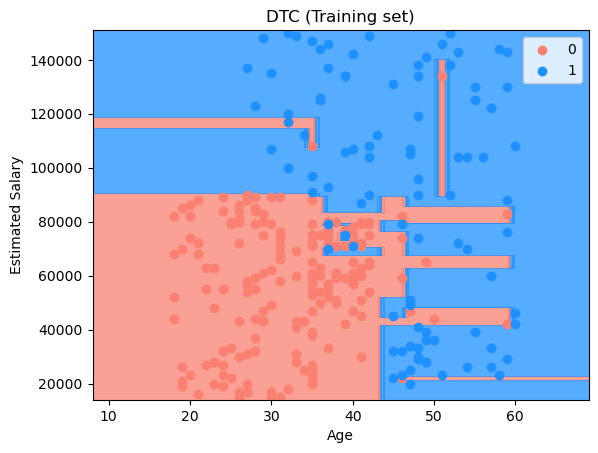

In [130]:
#visualizing the training set resuls
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('DTC (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


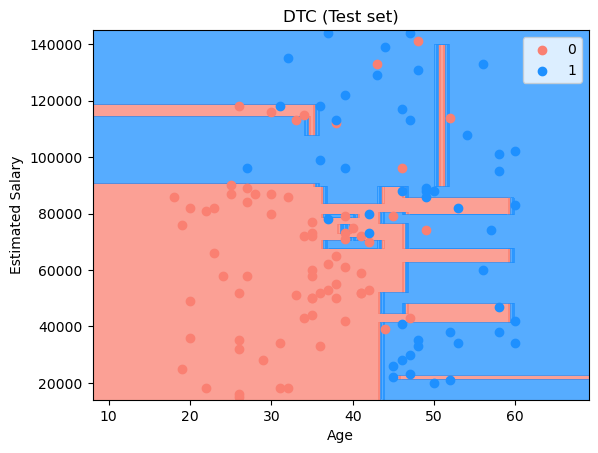

In [131]:
#visualizing the test set resuls
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('DTC (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()